## Instalar Pacotes


In [ ]:
!pip install google-generativeai pandas scikit-learn

## Importar Bibliotecas


In [ ]:
import google.generativeai as genai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


## Configurar Chaves de API

In [ ]:
GOOGLE_API_KEY = 'Minha API criada pelo Google AI Studio'
genai.configure(api_key=GOOGLE_API_KEY)

# Case Prático: Correção de Dataset Desbalanceado Usando Gen AI


Somos a equipe de dados de uma fintech e nosso desafio é construir um modelo para detectar transações fraudulentas. O problema é que nosso dataset é extremamente desbalanceado: mais de 99% das transações são legítimas. Modelos de ML clássicos sofrem para aprender com tão poucos exemplos de fraude.

__Nossa Estratégia:__

1. Treinar um modelo baseline para provar que ele é ruim em detectar fraudes.
2. Usar o Gemini para gerar novos dados sintéticos de fraude.
3. Retreinar o modelo com os dados aumentados e comprovar a melhora.

## Carregando o Dataset de Fraude

In [ ]:
#Carregando o Dataset
url_fraud = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df_fraud = pd.read_csv(url_fraud)

In [ ]:
#Shape
df_fraud.shape

(284807, 31)

In [ ]:
#Sample
df_fraud.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228266,145428.0,2.049997,-0.313465,-2.033659,-0.587258,0.151638,-1.480204,0.517362,-0.390846,0.403712,...,0.153956,0.544066,-0.030082,0.109000,0.216339,1.057563,-0.151048,-0.099843,27.83,0
191165,129143.0,1.352000,-0.679109,-0.881264,3.898628,0.324901,1.468232,-0.014074,0.273047,-0.451975,...,0.258126,0.315166,-0.211964,0.041547,0.048177,0.097471,-0.064644,-0.009266,281.38,0
46972,43012.0,-1.208809,0.309087,2.286458,2.365361,0.136550,1.310201,0.513868,0.516709,-1.622976,...,0.134706,-0.095399,0.386643,-0.350857,-0.133909,0.004441,0.031181,0.093578,179.00,0
229143,145815.0,-0.574536,0.096195,-0.356205,-0.282093,0.739521,-1.280711,1.891300,-0.896548,0.479282,...,0.050894,0.931652,0.249697,-0.051494,0.058146,-0.221819,-0.309597,-0.497828,132.89,0
47092,43079.0,-0.848765,1.799822,-1.773887,0.023498,2.352204,3.674257,-1.341393,-1.367944,-1.068842,...,-1.195891,0.304438,0.098574,0.857698,-0.059294,-0.341389,-0.197244,0.041162,1.00,0


## Análise Exploratória (EDA)

In [ ]:
# Value Counts da variavel Class
df_fraud['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# Normalizacao
df_fraud['Class'].value_counts(normalize=True) * 100

,proportion
Class,
0,99.827251
1,0.172749


## Modelo Baseline: Treinando nos Dados Originais

In [ ]:
# Regressao logistica
X = df_fraud.drop('Class', axis=1) # Variavel preditora: informações usadas para prever algo
y = df_fraud['Class'] # Saida: o que queremos que o modelo aprenda a prever
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 1. Selecionar modelo
model = LogisticRegression()

# 2. Treinar modelo
model.fit(X_train, y_train)

# 3. Fazer as predicoes
y_pred_baseline = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Report de classificacao
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.71      0.59      0.64       149

    accuracy                           1.00     85443
   macro avg       0.85      0.80      0.82     85443
weighted avg       1.00      1.00      1.00     85443



<Axes: >

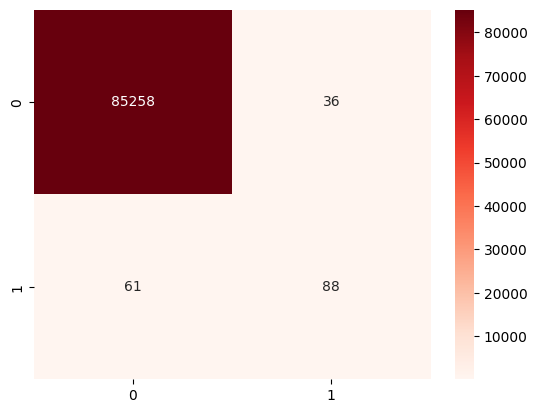

In [ ]:
# Matriz de confusao
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Reds')

1. Precisão (Precision) A precisão responde à pergunta: "De todas as vezes que o modelo previu a classe 1, quantas ele acertou?"

É uma métrica de "qualidade" da previsão positiva. Uma alta precisão significa que, quando o modelo diz que é 1, ele tem uma alta probabilidade de estar certo.

Interpretação: De todas as previsões "positivas" (classe 1) que o modelo fez, 83.6% estavam corretas.

2. Recall (Revocação ou Sensibilidade) O recall responde à pergunta: "De todos os exemplos que eram realmente da classe 1, quantos o modelo conseguiu encontrar?"

É uma métrica de "quantidade" ou "abrangência". Um recall alto significa que o modelo é bom em encontrar todos os exemplos positivos existentes nos dados.

Interpretação: O modelo foi capaz de identificar 65.5% de todos os casos que realmente pertenciam à classe 1. Os outros 34.5% (os 51 Falsos Negativos) não foram detectados.

## Usando IA Generativa para Criar Dados Sintéticos

In [ ]:
# Pegando 5 exemplos de fraude do nosso dataset para mostrar ao LLM
df_fraudes_reais = X_train[y_train == 1].sample(5)

#Formatando os exemplos para o prompt (Few-Shot Prompting)
exemplos_texto = ''
#TODO Gerar exemplos
for i, row in df_fraudes_reais.iterrows():
  exemplos_texto += f'Exemplo de transação fraudulenta {i+1}:\n'
  exemplos_texto += str(row.to_dict()) + '\n\n'

prompt_geracao = f"""
Você é um especialista em ciência de dados simulando dados para um modelo de detecção de fraude.
Com base nos exemplos de transações fraudulentas abaixo, gere 10 novos exemplos de transações fictícias, mas realistas, que sigam um padrão similar.
Retorne apenas os dicionários de dados, um por linha, sem texto adicional.

{exemplos_texto}

Gere 10 novos exemplos aqui:
"""

In [ ]:
model_gen = genai.GenerativeModel('gemini-2.5-flash')
response = model_gen.generate_content(prompt_geracao)

In [ ]:
# Processando a resposta do LLM para transformá-la em um DataFrame
novas_fraudes = []
for line in response.text.strip().split('\n'):
    try:
        novas_fraudes.append(ast.literal_eval(line))
    except:
        continue # Ignora linhas mal formatadas

# Criando novo DataFrame
df_novas_fraudes = pd.DataFrame(novas_fraudes)

In [ ]:
df_novas_fraudes['Class'] = 1

In [ ]:
df_novas_fraudes


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,146141.0,-2.131976,1.049443,-5.167894,4.156712,-0.738872,-0.998144,-3.874552,1.884576,-3.102605,...,1.077227,0.612504,-0.491295,-0.402288,0.355151,0.177098,0.812328,0.201402,0.00,1
1,156095.0,-2.998236,3.874567,-4.567890,5.765432,-0.234568,-1.345679,-4.012346,0.890123,-3.567890,...,1.012346,0.712346,-0.589012,-0.478901,0.312346,0.212346,0.890123,0.234568,1.00,1
2,166710.0,-3.109877,4.109877,-4.987654,5.987654,-0.678901,-1.678901,-3.987654,0.789012,-3.789012,...,1.189012,0.689012,-0.589012,-0.489012,0.389012,0.189012,0.889012,0.289012,234.56,1
3,177969.0,-2.765432,4.210988,-4.210988,5.210988,-0.876543,-1.765432,-4.567890,0.987654,-4.012346,...,1.043211,0.543211,-0.432110,-0.321099,0.210988,0.110988,0.765432,0.123457,80.22,1
4,189870.0,-3.210988,0.210988,-6.210988,3.543211,0.321099,-1.654321,-1.432110,0.765432,-3.210988,...,0.910988,1.345679,1.912346,-0.154321,1.312346,0.054321,1.110988,0.054321,320.01,1
5,190479.0,-2.578901,2.210988,-5.210988,1.543211,-1.765432,-0.876543,-3.765432,2.012346,-0.876543,...,0.876543,0.454321,0.312346,-0.321099,-0.410988,0.510988,0.410988,-0.154321,55.75,1
6,200427.0,-2.998765,3.998765,-4.898765,5.898765,-0.598765,-1.498765,-3.898765,0.698765,-3.498765,...,1.198765,0.698765,-0.598765,-0.498765,0.398765,0.198765,0.898765,0.298765,45.00,1
7,207753.0,-2.777778,4.111111,-4.777778,5.555556,-0.666667,-1.333333,-4.000000,0.777778,-3.666667,...,1.055556,0.588889,-0.455556,-0.388889,0.288889,0.155556,0.855556,0.211111,1.00,1
8,214619.0,-2.666667,4.000000,-4.555556,5.222222,-0.777778,-1.444444,-3.888889,0.888889,-3.555556,...,1.111111,0.666667,-0.555556,-0.444444,0.333333,0.222222,0.888889,0.222222,0.00,1
9,222839.0,-2.888889,4.222222,-5.000000,5.888889,-0.666667,-1.555556,-3.777778,0.777778,-3.666667,...,1.000000,0.666667,-0.555556,-0.444444,0.333333,0.111111,0.888889,0.222222,287.14,1


## Modelo Aprimorado: Treinando com os Dados Aumentados

In [ ]:
print("\n--- 🚀 Treinando nosso Modelo Aprimorado com Dados Sintéticos ---")
X_train_aumentado = pd.concat([X_train, df_novas_fraudes.drop('Class', axis=1)], ignore_index=True)
y_train_aumentado = pd.concat([y_train, df_novas_fraudes['Class']], ignore_index=True)

model_melhorado = LogisticRegression()
model_melhorado.fit(X_train_aumentado, y_train_aumentado)
y_pred_melhorado = model_melhorado.predict(X_test)


--- 🚀 Treinando nosso Modelo Aprimorado com Dados Sintéticos ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparando resultados

In [ ]:
print("\n--- Resultado do Modelo Baseline ---")
print(classification_report(y_test, y_pred_baseline))

print("\n--- Resultado do Modelo Aprimorado ---")
print(classification_report(y_test, y_pred_melhorado))


--- Resultado do Modelo Baseline ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.71      0.59      0.64       149

    accuracy                           1.00     85443
   macro avg       0.85      0.80      0.82     85443
weighted avg       1.00      1.00      1.00     85443


--- Resultado do Modelo Aprimorado ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.75      0.69      0.72       149

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Text(0.5, 1.0, 'Matriz de Confusão - Modelo Baseline')

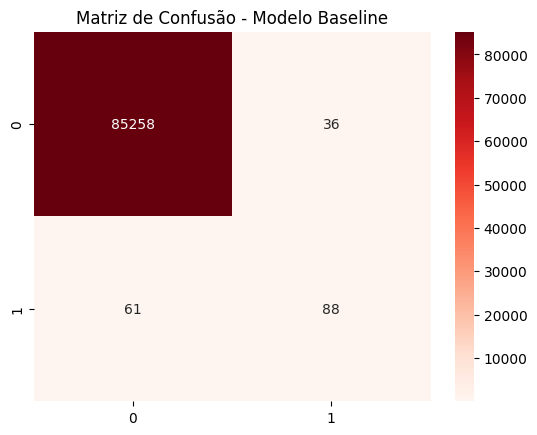

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão - Modelo Baseline')

Text(0.5, 1.0, 'Matriz de Confusão - Modelo Aprimorado com GenAI')

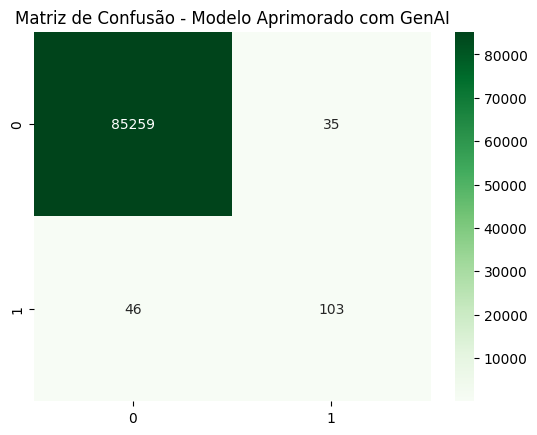

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_melhorado), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Modelo Aprimorado com GenAI')